In [179]:
import pandas as pd 
import numpy as np 

np.random.seed = 2021

from sklearn.datasets import load_iris
iris = load_iris()
print ('data contains:',iris.keys())
X, y, labels, feature_names  = iris.data, iris.target, iris.target_names, iris['feature_names']
df_iris= pd.DataFrame(X, columns= feature_names) 
df_iris['label'] =  y
features_dict = {k:v for k,v in  enumerate(labels)}
df_iris['label_names'] = df_iris.label.apply(lambda x: features_dict[x])
df_iris

data contains: dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label,label_names
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


In [180]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

best_k = None
best_accuracy = 0

for k in range(1, 10):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    accuracy = knn.score(X_test, y_test)
    
    #scores = cross_val_score(knn, X_train, y_train, cv=5)  # Перехресна перевірка на тренувальному наборі
    #accuracy = scores.mean()
   
    print(f"K={k}, Accuracy: {accuracy}")
    if accuracy > best_accuracy:
        best_k = k
        best_accuracy = accuracy

print(f"The best k = {best_k} score =  {best_accuracy:.2f}")

K=1, Accuracy: 0.9736842105263158
K=2, Accuracy: 0.9736842105263158
K=3, Accuracy: 0.9736842105263158
K=4, Accuracy: 0.9736842105263158
K=5, Accuracy: 0.9736842105263158
K=6, Accuracy: 0.9736842105263158
K=7, Accuracy: 0.9736842105263158
K=8, Accuracy: 0.9736842105263158
K=9, Accuracy: 0.9736842105263158
The best k = 1 score =  0.97


In [181]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler  # Імпортуємо StandardScaler

# Розділяємо дані на тренувальний та тестовий набори
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Ініціалізуємо StandardScaler
scaler = StandardScaler()

# Відмасштабовуємо тренувальний та тестовий набори
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

best_k = None
best_accuracy = 0

for k in range(1, 10):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    
    accuracy = knn.score(X_test_scaled, y_test)
    
    print(f"K={k}, Accuracy: {accuracy}")
    if accuracy > best_accuracy:
        best_k = k
        best_accuracy = accuracy

print(f"The best k = {best_k} score = {best_accuracy:.2f}")

K=1, Accuracy: 0.9210526315789473
K=2, Accuracy: 0.9473684210526315
K=3, Accuracy: 0.9736842105263158
K=4, Accuracy: 0.9736842105263158
K=5, Accuracy: 0.9736842105263158
K=6, Accuracy: 0.9736842105263158
K=7, Accuracy: 0.9736842105263158
K=8, Accuracy: 0.9736842105263158
K=9, Accuracy: 0.9736842105263158
The best k = 3 score = 0.97


synthetic dataset

<IPython.core.display.Javascript object>


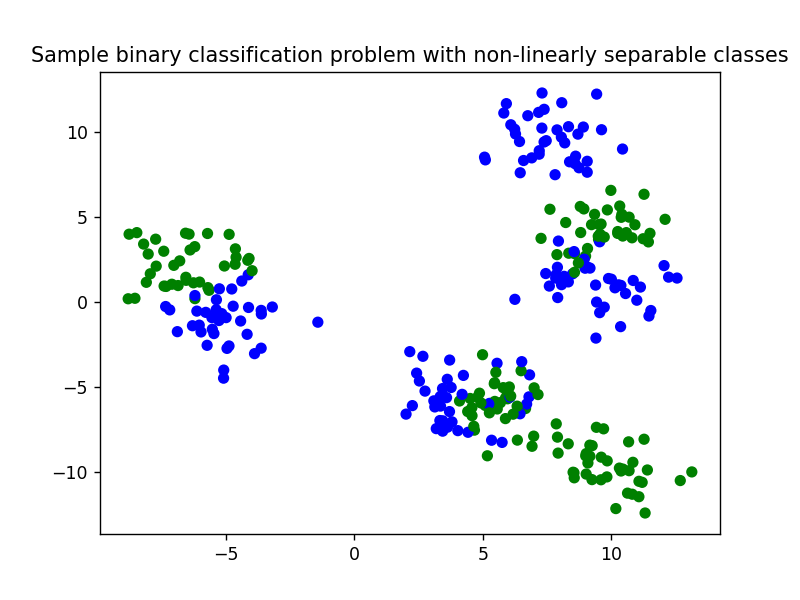

In [182]:
import numpy as np
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
%matplotlib notebook
from matplotlib.colors import ListedColormap
cmap_bold = ListedColormap(['blue','#FFFF00','black','green'])

np.random.seed= 2021
X_D2, y_D2 = make_blobs(n_samples = 300, n_features = 2, centers = 8,
                       cluster_std = 1.3, random_state = 4)
y_D2 = y_D2 % 2
plt.figure()
plt.title('Sample binary classification problem with non-linearly separable classes')
plt.scatter(X_D2[:,0], X_D2[:,1], c=y_D2,
           marker= 'o', s=30, cmap=cmap_bold)

In [185]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
np.random.seed= 2021

X_train, X_test, y_train, y_test = train_test_split(X_D2, y_D2, random_state=0)

best_k = None
best_accuracy = 0

for k in range(1, 20):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    accuracy = knn.score(X_test, y_test)
    print(f"K={k}, Accuracy: {accuracy}")
    if accuracy > best_accuracy:
        best_k = k
        best_accuracy = accuracy

print(f"The best k = {best_k}, score = {best_accuracy}")

K=1, Accuracy: 0.9333333333333333
K=2, Accuracy: 0.88
K=3, Accuracy: 0.8933333333333333
K=4, Accuracy: 0.8666666666666667
K=5, Accuracy: 0.9066666666666666
K=6, Accuracy: 0.88
K=7, Accuracy: 0.9333333333333333
K=8, Accuracy: 0.92
K=9, Accuracy: 0.92
K=10, Accuracy: 0.92
K=11, Accuracy: 0.8933333333333333
K=12, Accuracy: 0.8933333333333333
K=13, Accuracy: 0.9066666666666666
K=14, Accuracy: 0.9066666666666666
K=15, Accuracy: 0.9066666666666666
K=16, Accuracy: 0.9466666666666667
K=17, Accuracy: 0.9333333333333333
K=18, Accuracy: 0.92
K=19, Accuracy: 0.9333333333333333
The best k = 16, score = 0.9466666666666667


<IPython.core.display.Javascript object>


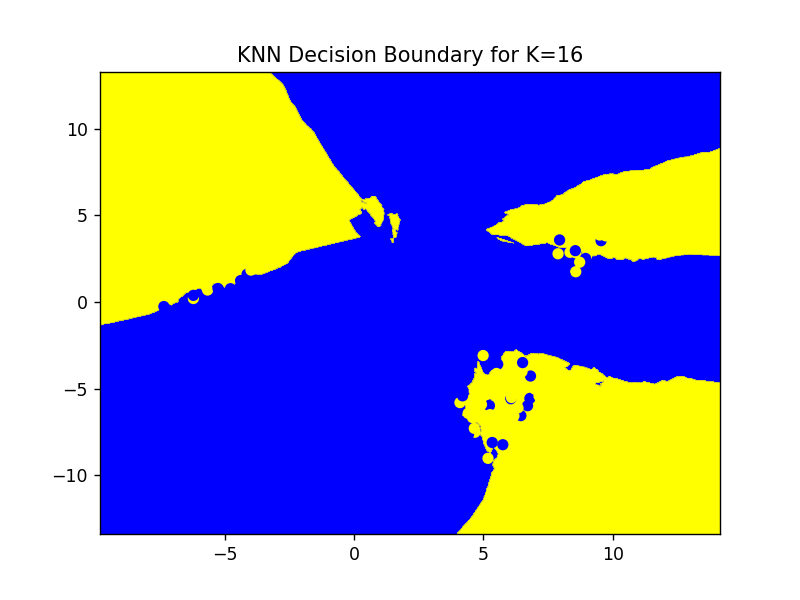

In [186]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
cmap_bold = ListedColormap(['#0000FF', '#FFFF00'])
h = .02
x_min, x_max = X_D2[:, 0].min() - 1, X_D2[:, 0].max() + 1
y_min, y_max = X_D2[:, 1].min() - 1, X_D2[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_bold)

plt.contourf(xx, yy, Z, cmap=cmap_bold, alpha=0.3)

plt.scatter(X_D2[:, 0], X_D2[:, 1], c=y_D2, marker='o', s=30, cmap=cmap_bold)
plt.title(f'KNN Decision Boundary for K={best_k}')
plt.show()

